<h1>Practical Tasks<h1>

<h2>Import modules<h2>

In [143]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from itertools import combinations
from sklearn.metrics import r2_score # built-in way to find R2
plt.style.use('seaborn-whitegrid')

<h2>Common functions<h2>

In [144]:
def calculate_R2(X, y):
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    coeffs = XTX_inv.dot(X.T).dot(y) # coeffs of linear regression model
    Z = np.matmul(X, coeffs)         # approximaiton of y values
    upper = ((y - Z)**2).sum()
    lower = ((y - y.mean())**2).sum()
    R2 = 1 - upper / lower
    return Z, R2

def if_significant(X, R2, alpha):
    n = X.shape[0]
    m = X.shape[1] - 1
    k1 = m
    k2 = n - m - 1
    f_cr = stats.f.ppf(1-alpha, k1, k2)
    F = (R2 / k1) / ((1 - R2) / k2)
    print(f"F = {F:.3f}, f_cr = {f_cr:.3f}")
    msg = f"The linear regression model fits the data at the significance level of {alpha}" if F > f_cr else f"The linear regression model does not fit the data at the significant level of {alpha}"
    return msg

<h2>Task 1<h2>

In [145]:
### input data
X0 = np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
               [-0.18757272, 1.30337355, 5.12093014, 3.46363202],
               [-0.81094525, 1.82463398, 5.79686488, 1.86159445],
               [ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
               [ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
               [-0.62972637, 0.77750764, 2.84124027, 4.54410559],
               [ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
               [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
               [ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
               [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])

y = np.array([ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
              7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

In [146]:
# useful functions
def slice_source_mtx(A, idxs_pair):
    """extract two columns from source matrix and adding a column of ones from the left side"""
    A_slice = A[:,[idxs_pair[0],idxs_pair[1]]]
    ones = np.ones((A_slice.shape[0], 1))
    X = np.hstack((ones,A_slice))
    return X

In [147]:
### 
### main
###

# built-in way to find linear regresion model coeffs
# Model2 = LinearRegression().fit(X,y)
# print((Model2.intercept_, Model2.coef_))

alpha = 0.05 # false positive error probability

# temp vars using at finding of R2 max value
R2_max = 0
Z_best = [0 for i in range(X0.shape[0])]
best_idx_pair = [0, 1] # idxs of columns for max R2

idx_pairs = list(combinations(range(0,X0.shape[1],1), 2)) # generate all unique pairs of indexes
# find max R2
for idx_pair in idx_pairs:
    X = slice_source_mtx(X0, idx_pair) # matrix of regressors values
    Z_i, R2_i = calculate_R2(X, y)
    if R2_i > R2_max:
        R2_max = R2_i
        best_idx_pair = list(idx_pair)
        Z_best = Z_i

print(f"The R2 max value: {R2_max:.2f} (user way), {r2_score(y,Z_best):.2f} (built-in way)")
print(f"The column positions of optimal regressors: ({best_idx_pair[0]},{best_idx_pair[1]})")
print(if_significant(slice_source_mtx(X0, best_idx_pair), R2_max, alpha))

The R2 max value: 0.76 (user way), 0.76 (built-in way)
The column positions of optimal regressors: (0,2)
F = 11.294, f_cr = 4.737
The linear regression model fits the data at the significance level of 0.05


<h2>Task 2<h2>

In [148]:
# source data
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])


In [149]:
# task 1
# find coeffs of linear regression model (using formulas for pair regression)
salary_mean = salary.mean()
scoring_mean = scoring.mean()
b1 = (np.mean(salary * scoring) - salary_mean * scoring_mean) / (np.mean(salary ** 2) - np.mean(salary) ** 2) # slope
b0 = scoring_mean - b1 * salary_mean # intercept

# find coeffs of linear regression model (OLS method)
ones = np.ones((salary.shape[0], 1))
X = np.hstack((ones,salary[:, np.newaxis]))
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
coeffs = XTX_inv.dot(X.T).dot(scoring)

print(f"b0: {b0:.2f} (user way), {coeffs[0]:.2f} (built-in way);\nb1: {b1:.2f} (user way), {coeffs[1]:.2f} (built-in way);")

b0: 444.18 (user way), 444.18 (built-in way);
b1: 2.62 (user way), 2.62 (built-in way);


(25.0, 200.0)

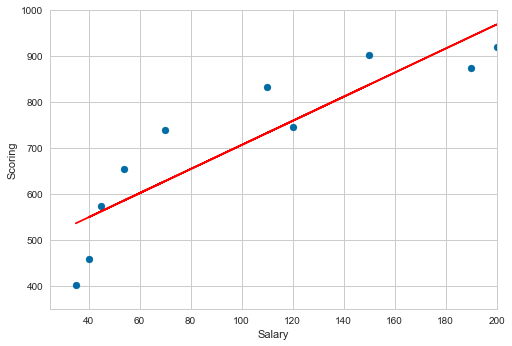

In [150]:
# task 2
plt.scatter(salary, scoring)
plt.plot(salary, b0 + b1*salary, color='red')
plt.xlabel('Salary')
plt.ylabel('Scoring')
plt.ylim(350, 1000)
plt.xlim(25, 200)

In [151]:
# task 3
Z, R2 = calculate_R2(X, scoring)
print(f'The determination coefficient: {R2:.2f} (user way), {r2_score(scoring, Z):.2f} (built-in way)')

The determination coefficient: 0.79 (user way), 0.79 (built-in way)


In [152]:
# task 4
print(if_significant(X, R2, 0.05))

F = 29.672, f_cr = 5.318
The linear regression model fits the data at the significance level of 0.05


In [153]:
# task 5

# check whether founded values of coefficients are statistically significant
scoring_predicted = b0 + b1 * salary # predicted scoring values
n = scoring.size
t_cr = stats.t.ppf(1 - alpha/2, n - 2) # critical t-statistic value
scoring_std = np.sqrt(np.sum((scoring - scoring_predicted)**2) / (n - 2)) # standard error
m_b0 = scoring_std * np.sqrt(np.sum(salary**2)) / (n * np.std(salary))
m_b1 = scoring_std / (np.sqrt(n) * np.std(salary))
# find observed value of t statistic
t_b0 = b0 / m_b0 
t_b1 = b1 / m_b1
print(f"t_b0 = {t_b0:.3f}, t_cr = {t_cr:.3f}")
print(f"t_b1 = {t_b1:.3f}, t_cr = {t_cr:.3f}")
print(f"The founded coefficient values are statistically sigificant at the level of {alpha}\n")

# find confidence intervals for coefficients
delta_b0 = t_cr * m_b0 # the margin value of the intercept error
delta_b1 = t_cr * m_b1 # the margin value of the slope error
print(f"The b0 value ({b0:.2f}) should lie between {b0 - delta_b0:.2f} and {b0 + delta_b0:.2f} with {100*(1-alpha):.0f}% probability")
print(f"The b0 value ({b1:.2f}) should lie between {b1 - delta_b1:.2f} and {b1 + delta_b1:.2f} with {100*(1-alpha):.0f}% probability")

t_b0 = 7.866, t_cr = 2.306
t_b1 = 5.447, t_cr = 2.306
The founded coefficient values are statistically sigificant at the level of 0.05

The b0 value (444.18) should lie between 313.97 and 574.39 with 95% probability
The b0 value (2.62) should lie between 1.51 and 3.73 with 95% probability


In [154]:
# task 6
A = 1 / n * np.sum(np.abs((scoring - scoring_predicted) / scoring)) * 100 # average approximation error
print(f"The linear regression model relatively well fits the data (average approximation error: {A:.2f}%)")

The linear regression model relatively well fits the data (average approximation error: 11.47%)
